In [2]:
!unzip archive.zip -d /content/


Archive:  archive.zip
  inflating: /content/Mall_Customers.csv  


In [3]:
!ls /content/

archive.zip  Mall_Customers.csv  sample_data


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/Mall_Customers.csv")

# Show first 5 rows
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# See basic info about dataset
df.info()

# Check first 10 rows
df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [6]:
# Select only Annual Income and Spending Score for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Show first 5 rows
X.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [8]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Mall_Customers.csv")

# Check the first few rows to confirm
print(data.head())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [9]:
# Extract Annual Income (col 3) and Spending Score (col 4)
X = data.iloc[:, [3, 4]].values
print(X[:5])   # just to confirm


[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


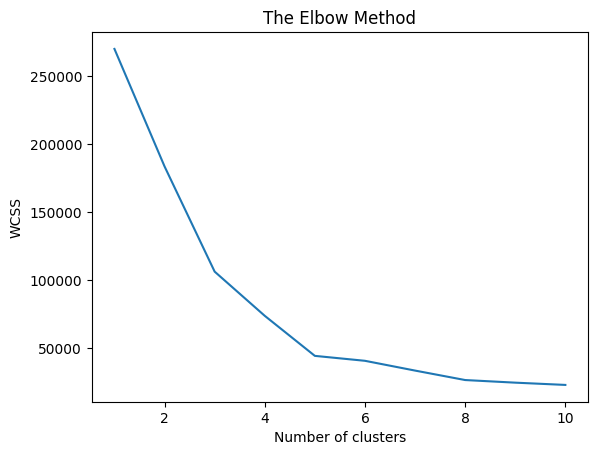

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # within-cluster sum of squares
for i in range(1, 11):   # try 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


In [11]:
# Fit KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

print(y_kmeans[:10])  # cluster numbers of first 10 customers


[4 2 4 2 4 2 4 2 4 2]


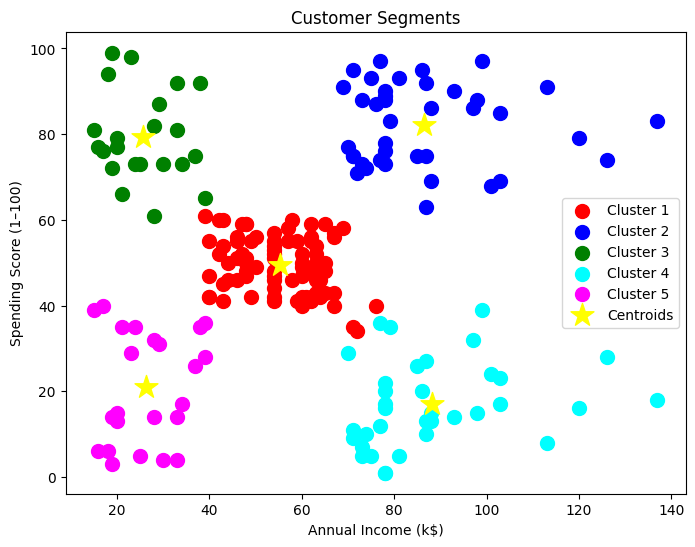

In [12]:
plt.figure(figsize=(8,6))

# Plot each cluster
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', marker='*', label='Centroids')

plt.title("Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.legend()
plt.show()


In [13]:
print("Cluster Centers (Annual Income, Spending Score):")
print(kmeans.cluster_centers_)


Cluster Centers (Annual Income, Spending Score):
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


In [14]:
data['Cluster'] = y_kmeans
data.to_csv("Clustered_Customers.csv", index=False)


In [15]:
print(data['Cluster'].value_counts())


Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


/tmp/ipython-input-2358777025.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=data, palette="Set2")


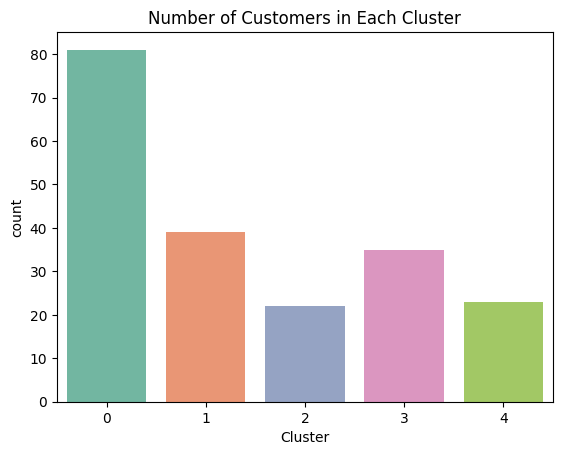

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Cluster', data=data, palette="Set2")
plt.title("Number of Customers in Each Cluster")
plt.show()


/tmp/ipython-input-2659471462.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Annual Income (k$)', data=data, palette="Set3")


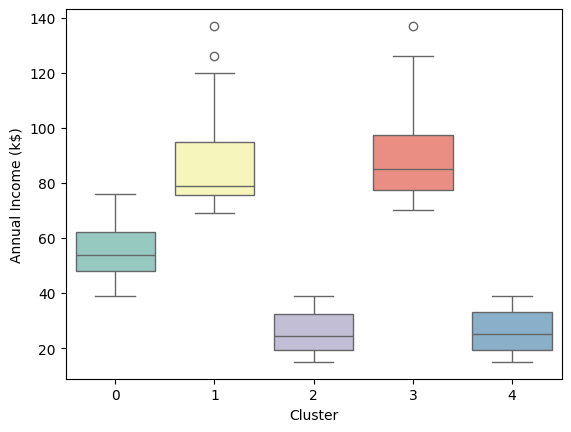

In [18]:
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=data, palette="Set3")
plt.show()




/tmp/ipython-input-2069322138.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=data, palette="Set2")


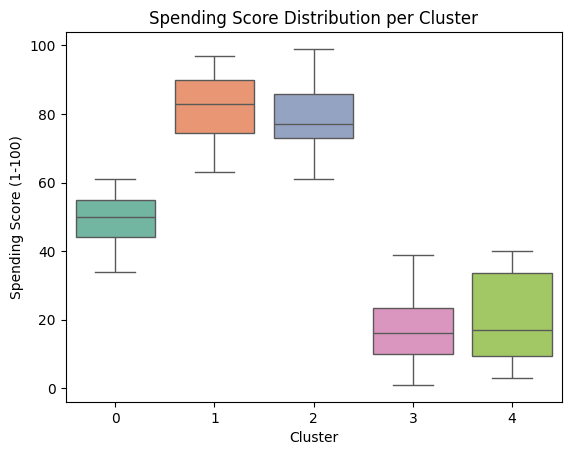

In [19]:
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=data, palette="Set2")
plt.title("Spending Score Distribution per Cluster")
plt.show()


In [20]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Frequency = number of purchases in a month (1 to 20)
df["Frequency"] = np.random.randint(1, 21, df.shape[0])

# Recency = days since last purchase (1 to 200 days)
df["Recency"] = np.random.randint(1, 201, df.shape[0])

# Monetary = total spend in last 6 months ($100 - $10,000)
df["Monetary"] = np.random.randint(100, 10001, df.shape[0])

df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Frequency,Recency,Monetary
0,1,Male,19,15,39,7,90,104
1,2,Male,21,15,81,20,195,5322
2,3,Female,20,16,6,15,147,5415
3,4,Female,23,16,77,11,148,4969
4,5,Female,31,17,40,8,96,976


In [21]:
# Save enhanced dataset for future use
df.to_csv("Mall_Customers_Enhanced.csv", index=False)


In [22]:
# Define thresholds for loyalty
df["Loyalty"] = np.where(
    (df["Frequency"] > 10) & (df["Recency"] < 90) & (df["Monetary"] > 5000),
    1,  # Loyal customer
    0   # Churn risk
)

# Check how many loyal vs churn risk customers we have
df["Loyalty"].value_counts()


,count
Loyalty,
0,182
1,18


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Select features for prediction
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)", "Frequency", "Recency", "Monetary"]]
y = df["Loyalty"]

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[37  1]
 [ 1  1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       0.50      0.50      0.50         2

    accuracy                           0.95        40
   macro avg       0.74      0.74      0.74        40
weighted avg       0.95      0.95      0.95        40



In [24]:
import pandas as pd

# Get feature importance (coefficients) from logistic regression
importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print("Feature Importance:\n", importance)


Feature Importance:
                   Feature  Coefficient
3               Frequency     0.574934
0                     Age     0.041635
2  Spending Score (1-100)     0.011611
5                Monetary     0.001026
1      Annual Income (k$)    -0.004303
4                 Recency    -0.072057


In [25]:
def explain_customer(customer_id, X, model):
    customer = X.iloc[customer_id]
    probs = model.predict_proba([customer])[0]
    prediction = model.predict([customer])[0]

    print(f"Customer {customer_id}: {'Loyal' if prediction == 1 else 'Not Loyal'} (Probability: {probs[1]:.2f})\n")
    print("Reasoning:")

    importance = model.coef_[0]
    for feature, value, weight in zip(X.columns, customer, importance):
        contribution = value * weight
        if abs(contribution) > 0.05:  # only show strong effects
            sign = "↑" if contribution > 0 else "↓"
            print(f" - {feature}: {value} ({sign} loyalty)")


In [26]:
explain_customer(5, X, model)


Customer 5: Not Loyal (Probability: 0.00)

Reasoning:
 - Age: 22 (↑ loyalty)
 - Annual Income (k$): 17 (↓ loyalty)
 - Spending Score (1-100): 76 (↑ loyalty)
 - Frequency: 7 (↑ loyalty)
 - Recency: 199 (↓ loyalty)
 - Monetary: 9283 (↑ loyalty)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [29]:
# -----------------------------
# Customer Loyalty Prediction
# Supports New Dataset Upload
# -----------------------------

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# -----------------------------
# 1. Train Model on Mall_Customers.csv
# -----------------------------

# Load training dataset
df = pd.read_csv("Mall_Customers.csv")

# Encode Gender
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])  # Male=1, Female=0

# Features
X = df[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Target (define loyalty rule: Spending Score >= 50)
df['Loyalty'] = (df['Spending Score (1-100)'] >= 50).astype(int)
y = df['Loyalty']

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Show performance
print("Model Performance on Training Data:\n")
print(confusion_matrix(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))

# -----------------------------
# 2. Function to Predict on New Dataset
# -----------------------------

def predict_new_dataset(file_path):
    """Predict loyalty on a new dataset (CSV)."""
    new_df = pd.read_csv(file_path)

    # Encode Gender
    new_df['Gender'] = le.transform(new_df['Gender'])

    # Extract features
    X_new = new_df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
    X_new_scaled = scaler.transform(X_new)

    # Predict loyalty
    new_df['Predicted_Loyalty'] = model.predict(X_new_scaled)
    new_df['Loyalty_Probability'] = model.predict_proba(X_new_scaled)[:, 1]

    return new_df[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
                   'Spending Score (1-100)', 'Predicted_Loyalty', 'Loyalty_Probability']]

# -----------------------------
# 3. Explain Prediction for a Specific Customer
# -----------------------------

def explain_customer_from_new(df_new, customer_id):
    """Explain why a customer is Loyal/Not Loyal from new dataset."""
    customer = df_new[df_new['CustomerID'] == customer_id].iloc[0]
    features = ['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
    values = customer[features].values.reshape(1, -1)

    scaled = scaler.transform(values)
    prediction = model.predict(scaled)[0]
    prob = model.predict_proba(scaled)[0]

    print(f"Customer {customer_id}: {'Loyal' if prediction==1 else 'Not Loyal'} "
          f"(Probability: {prob[prediction]:.2f})")
    print("Reasoning:")

    importance = model.coef_[0]
    for feature, value, weight in zip(features, values[0], importance):
        contribution = value * weight
        if abs(contribution) > 0.05:
            sign = "↑" if contribution > 0 else "↓"
            print(f" - {feature}: {value:.2f} ({sign} loyalty)")

# -----------------------------
# Example Usage
# -----------------------------
# new_data = predict_new_dataset("new_customers.csv")
# print(new_data.head())
# explain_customer_from_new(new_data, customer_id=5)


Model Performance on Training Data:

[[20  0]
 [ 2 18]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       1.00      0.90      0.95        20

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



In [31]:
# 1) Unzip to /content/new_data and list files
!mkdir -p /content/new_data
!unzip -o /content/online_retail_customers.zip -d /content/new_data > /dev/null
!find /content/new_data -maxdepth 2 -type f -printf '%f\n'


online_retail_customer_churn.csv


In [41]:
import pandas as pd

# Path to the extracted CSV
new_dataset_path = "/content/new_data/online_retail_customer_churn.csv"

# Load the dataset
new_df = pd.read_csv(new_dataset_path)

# Check shape and preview
print("Shape:", new_df.shape)
new_df.head()


Shape: (1000, 15)


,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


In [42]:
# Basic info
print("Shape:", new_df.shape)
print("\nColumns:\n", new_df.columns)

# Data types and missing values
print("\nInfo:")
print(new_df.info())

print("\nMissing values:")
print(new_df.isnull().sum())

# Quick statistics
print("\nSummary statistics:")
print(new_df.describe())

# First 5 rows
new_df.head()



Shape: (1000, 15)

Columns:
 Index(['Customer_ID', 'Age', 'Gender', 'Annual_Income', 'Total_Spend',
       'Years_as_Customer', 'Num_of_Purchases', 'Average_Transaction_Amount',
       'Num_of_Returns', 'Num_of_Support_Contacts', 'Satisfaction_Score',
       'Last_Purchase_Days_Ago', 'Email_Opt_In', 'Promotion_Response',
       'Target_Churn'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Annual_Income               1000 non-null   float64
 4   Total_Spend                 1000 non-null   float64
 5   Years_as_Customer           1000 non-null   int64  
 6   Num_of_Purchases            1000 non-null   int64  
 7   

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


In [48]:
import os

print(os.listdir("/content/new_data"))


['online_retail_customer_churn.csv']


In [49]:
from google.colab import files
uploaded = files.upload()   # select mall_customer_churn.csv from your system


Saving archive.zip to archive (1).zip


In [50]:
import zipfile
import os

# Unzip the archive
with zipfile.ZipFile("archive (1).zip", 'r') as zip_ref:
    zip_ref.extractall("/content/new_data")

# Check extracted files
os.listdir("/content/new_data")



['Mall_Customers.csv', 'online_retail_customer_churn.csv']

In [51]:
import pandas as pd

# ------------------------------
# 1. Load Datasets
# ------------------------------
mall_df = pd.read_csv("/content/new_data/Mall_Customers.csv")
retail_df = pd.read_csv("/content/new_data/online_retail_customer_churn.csv")

# Fix column name: Genre → Gender
if "Genre" in mall_df.columns:
    mall_df.rename(columns={"Genre": "Gender"}, inplace=True)

print("Mall dataset columns:", mall_df.columns)
print("Retail dataset columns:", retail_df.columns)

# ------------------------------
# 2. Check target column
# ------------------------------
# For mall dataset, we assume there's a Target_Churn column (if not, we may need to add or label encode)
if "Target_Churn" in mall_df.columns:
    print("✅ Mall dataset already has Target_Churn")
else:
    print("⚠️ Mall dataset does not have Target_Churn — may need preprocessing")

# ------------------------------
# 3. Align both datasets
# ------------------------------
# Common columns we can use
common_cols = list(set(mall_df.columns).intersection(set(retail_df.columns)))
print("Common columns:", common_cols)

mall_aligned = mall_df[common_cols]
retail_aligned = retail_df[common_cols]

# Show preview
print("\nMall aligned:\n", mall_aligned.head())
print("\nRetail aligned:\n", retail_aligned.head())


Mall dataset columns: Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
Retail dataset columns: Index(['Customer_ID', 'Age', 'Gender', 'Annual_Income', 'Total_Spend',
       'Years_as_Customer', 'Num_of_Purchases', 'Average_Transaction_Amount',
       'Num_of_Returns', 'Num_of_Support_Contacts', 'Satisfaction_Score',
       'Last_Purchase_Days_Ago', 'Email_Opt_In', 'Promotion_Response',
       'Target_Churn'],
      dtype='object')
⚠️ Mall dataset does not have Target_Churn — may need preprocessing
Common columns: ['Age', 'Gender']

Mall aligned:
    Age  Gender
0   19    Male
1   21    Male
2   20  Female
3   23  Female
4   31  Female

Retail aligned:
    Age Gender
0   62  Other
1   65   Male
2   18   Male
3   21  Other
4   21  Other
